In [1]:
import pandas as pd

# Load the dataset
file_path = 'lfd_2023_group4.csv'
data = pd.read_csv(file_path)

data.head()

,weight,length,location,expense,recoil,moisture,x_offset,y_offset,appearance,distance,target
0,522,156,Italy,976,30.62,28.88,-0.59,-95.77,flat,36.39,widget1
1,506,104,Germany,1311,75.52,52.77,19.78,-48.43,bumpy,19.78,widget4
2,472,112,Italy,1751,63.19,51.55,82.32,-104.74,bumpy,24.95,widget4
3,611,104,Japan,882,66.56,42.80,-156.32,-92.04,flat,27.82,widget7
4,348,118,China,1497,60.75,23.92,8.23,4.86,flat,39.93,widget8


In [2]:
# Impute missing values with the mean of the column
data['distance'].fillna(data['distance'].mean(), inplace=True)

# Check if there are any more missing values
missing_values_after_imputation = data.isnull().sum()

# For categorical variables, we will use one-hot encoding for the 'location' and 'appearance' columns
# This is because these are nominal variables without intrinsic ordering
data_encoded = pd.get_dummies(data, columns=['location', 'appearance'])

# Display the count of missing values after imputation and the first few rows of the new dataframe
missing_values_after_imputation, data_encoded.head()

(weight        0
 length        0
 location      0
 expense       0
 recoil        0
 moisture      0
 x_offset      0
 y_offset      0
 appearance    0
 distance      0
 target        0
 dtype: int64,
    weight  length  expense  recoil  moisture  x_offset  y_offset  distance  \
 0     522     156      976   30.62     28.88     -0.59    -95.77     36.39   
 1     506     104     1311   75.52     52.77     19.78    -48.43     19.78   
 2     472     112     1751   63.19     51.55     82.32   -104.74     24.95   
 3     611     104      882   66.56     42.80   -156.32    -92.04     27.82   
 4     348     118     1497   60.75     23.92      8.23      4.86     39.93   
 
     target  location_Belgium  ...  location_Japan  location_Russia  \
 0  widget1             False  ...           False            False   
 1  widget4             False  ...           False            False   
 2  widget4             False  ...           False            False   
 3  widget7             False  ...    

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import time

# Label encode the target variable
label_encoder = LabelEncoder()
data_encoded['target'] = label_encoder.fit_transform(data_encoded['target'])

# Split the dataset into features and target variable
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize classifiers
naive_bayes_classifier = GaussianNB()

# Train and evaluate Naïve Bayes
start_time = time.time()
naive_bayes_classifier.fit(X_train, y_train)
nb_training_time = time.time() - start_time
nb_predictions = naive_bayes_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
nb_accuracy

0.825

In [4]:
random_forest_classifier = RandomForestClassifier(random_state=42)
# Train and evaluate Random Forest
start_time = time.time()
random_forest_classifier.fit(X_train, y_train)
rf_training_time = time.time() - start_time
rf_predictions = random_forest_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_accuracy

0.881

In [5]:
svc = {
    'C': 1.0,          #C越大越嘗試最大限度正確分類訓練數據
    'kernel': 'linear',   #如何將數據點映射到更高維度。rbf用於非線性問題常用
    #'gamma': 'scale'   #for rbf poly sigmoid核，定義單個訓練樣本影響的範圍
}
svm_classifier = SVC(**svc)    #random_state=1

# Train and evaluate SVM
start_time = time.time()
svm_classifier.fit(X_train, y_train)
svm_training_time = time.time() - start_time
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_accuracy

0.895

In [6]:
# Summarize results
results = {
    'Naive Bayes': {'Accuracy': nb_accuracy, 'Training Time': nb_training_time},
    'Random Forest': {'Accuracy': rf_accuracy, 'Training Time': rf_training_time},
    'SVM': {'Accuracy': svm_accuracy, 'Training Time': svm_training_time}
}
results

{'Naive Bayes': {'Accuracy': 0.825, 'Training Time': 0.0029838085174560547},
 'Random Forest': {'Accuracy': 0.881, 'Training Time': 1.669795036315918},
 'SVM': {'Accuracy': 0.895, 'Training Time': 47.245445251464844}}

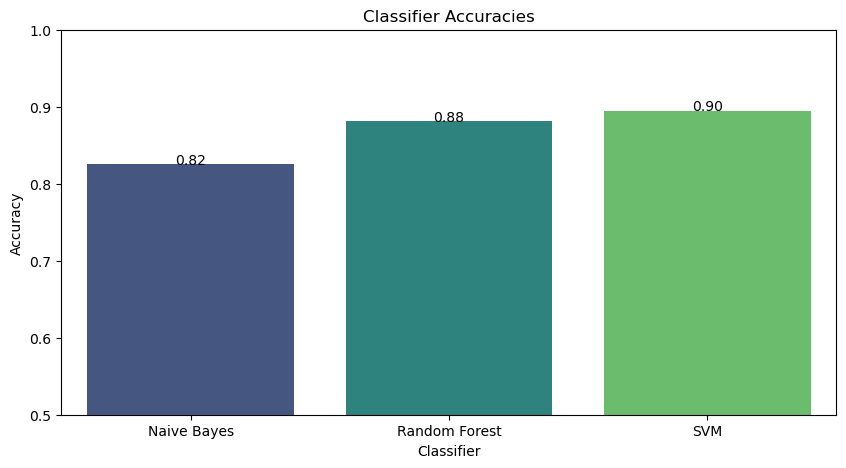

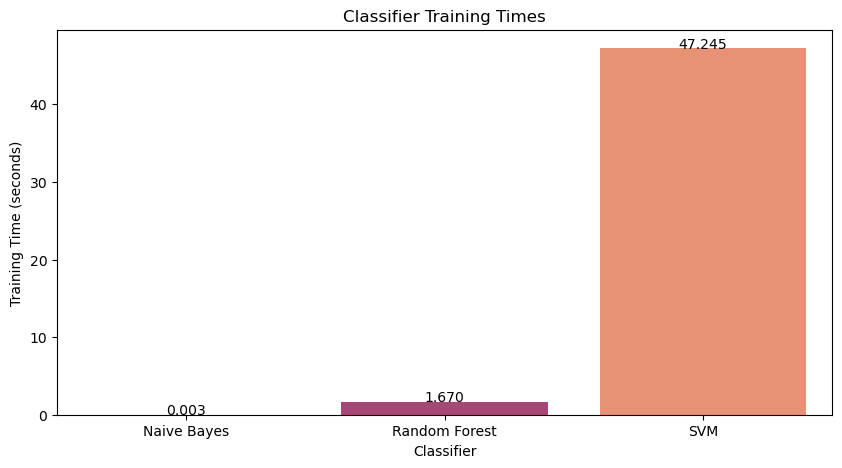

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of classifier accuracies
classifiers = ['Naive Bayes', 'Random Forest', 'SVM']
accuracies = [nb_accuracy, rf_accuracy, svm_accuracy]
training_times = [nb_training_time, rf_training_time, svm_training_time]

# Plotting accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=classifiers, y=accuracies, palette='viridis')
plt.title('Classifier Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
for i in range(len(accuracies)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha = 'center')
plt.ylim(0.5, 1)  # Set the limit to better visualize the differences
plt.show()

# Plotting training times
plt.figure(figsize=(10, 5))
sns.barplot(x=classifiers, y=training_times, palette='magma')   
plt.title('Classifier Training Times')
plt.ylabel('Training Time (seconds)')
plt.xlabel('Classifier')
for i in range(len(training_times)):
    plt.text(i, training_times[i], f'{training_times[i]:.3f}', ha = 'center')
plt.show()


In [8]:
from sklearn.preprocessing import StandardScaler

# 初始化标准缩放器
scaler = StandardScaler()

# 对训练数据进行缩放
X_train_scaled = scaler.fit_transform(X_train)

# 对测试数据进行相同的缩放
X_test_scaled = scaler.transform(X_test)

# 使用缩放后的数据重新训练SVM模型
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [9]:
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear','rbf'],
    #'gamma': 'scale'
}

# 使用GridSearchCV进行超参数搜索
grid_search = GridSearchCV(SVC(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("Best Parameters: ", grid_search.best_params_)

# 使用最佳参数重新训练模型
best_svm = grid_search.best_estimator_

svm_classifier = best_svm
svm_predictions = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
accuracies.append(svm_accuracy)

start_time1 = time.time()
svm_training_time1 = time.time() - start_time
svm_training_time1

Best Parameters:  {'C': 1, 'kernel': 'linear'}


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


310.29487800598145

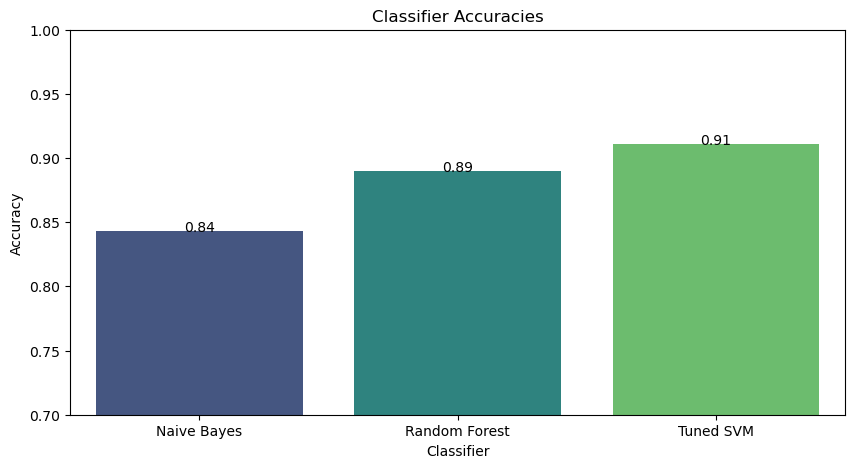

In [10]:
# Load the dataset
file_path = 'lfd_2023_group4.csv'
data = pd.read_csv(file_path)

# Impute missing values with the mean of the column
data['distance'].fillna(data['distance'].mean(), inplace=True)

# Check if there are any more missing values
missing_values_after_imputation = data.isnull().sum()

# For categorical variables, we will use one-hot encoding for the 'location' and 'appearance' columns
# This is because these are nominal variables without intrinsic ordering
data_encoded = pd.get_dummies(data, columns=['location', 'appearance'])

# Label encode the target variable
label_encoder = LabelEncoder()
data_encoded['target'] = label_encoder.fit_transform(data_encoded['target'])

# Split the dataset into features and target variable
X = data_encoded.drop('target', axis=1)
y = data_encoded['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize classifiers
naive_bayes_classifier = GaussianNB()
random_forest_classifier = RandomForestClassifier(random_state=42)

# Standardize features for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for SVM
param_grid_svm = {'C': [0.1, 10, 100], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# Use GridSearchCV to find the best parameters for SVM
grid_search_svm = GridSearchCV(SVC(random_state=42), param_grid_svm, cv=5)
grid_search_svm.fit(X_train_scaled, y_train)

# Get the best SVM model
best_svm = grid_search_svm.best_estimator_

# Predictions and accuracy for the best SVM model
svm_predictions = best_svm.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Initialize classifiers (including the tuned SVM)
classifiers = ['Naive Bayes', 'Random Forest', 'Tuned SVM']
accuracies = []

# Train and evaluate Naïve Bayes
naive_bayes_classifier.fit(X_train, y_train)
nb_predictions = naive_bayes_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
accuracies.append(nb_accuracy)

# Train and evaluate Random Forest
random_forest_classifier.fit(X_train, y_train)
rf_predictions = random_forest_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
accuracies.append(rf_accuracy)

# Train and evaluate the tuned SVM
svm_classifier = best_svm
svm_predictions = svm_classifier.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)
accuracies.append(svm_accuracy)

# Summarize results
results = {
    'Naive Bayes': {'Accuracy': nb_accuracy},
    'Random Forest': {'Accuracy': rf_accuracy},
    'Tuned SVM': {'Accuracy': svm_accuracy}
}

# Visualization of classifier accuracies
plt.figure(figsize=(10, 5))
sns.barplot(x=classifiers, y=accuracies, palette='viridis')
plt.title('Classifier Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
for i in range(len(accuracies)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha='center')
plt.ylim(0.7, 1)  # Set the limit to better visualize the differences
plt.show()

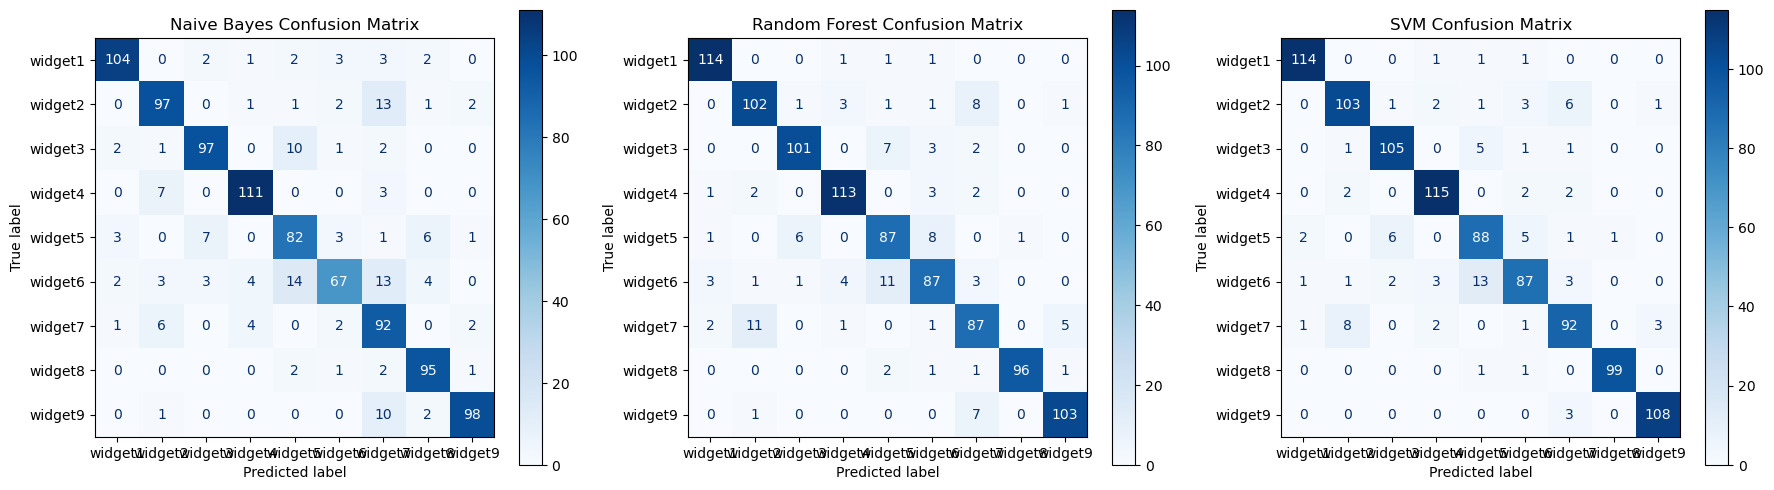

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrices for the classifiers
nb_cm = confusion_matrix(y_test, nb_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)
svm_cm = confusion_matrix(y_test, svm_predictions)

# Plot confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[1].set_title('Random Forest Confusion Matrix')
ax[2].set_title('SVM Confusion Matrix')

ConfusionMatrixDisplay(nb_cm, display_labels=label_encoder.classes_).plot(values_format='d', cmap='Blues', ax=ax[0])
ConfusionMatrixDisplay(rf_cm, display_labels=label_encoder.classes_).plot(values_format='d', cmap='Blues', ax=ax[1])
ConfusionMatrixDisplay(svm_cm, display_labels=label_encoder.classes_).plot(values_format='d', cmap='Blues', ax=ax[2])

plt.tight_layout()
plt.show()
